Exploratory Data Analysis (EDA)

In [1]:
# Import standard python libraries
import os,sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get the absolute path of the parent directory
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [3]:
# importing modules from scripts 
from scripts.eda_utils import *

In [4]:
# Load the datasets
df = pd.read_csv("../data/data.csv")
variable_df = pd.read_csv("../data/Xente_Variable_Definitions.csv")

In [5]:
# Variable definitions
variable_df

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader pr...


Overview of the Data

In [6]:
# The first 10 rows of the DataFrame
df.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [7]:
# The last 10 rows of the DataFrame
df.tail(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
95652,TransactionId_71994,BatchId_66957,AccountId_620,SubscriptionId_1833,CustomerId_960,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,1700.0,1700,2019-02-13T09:50:20Z,2,0
95653,TransactionId_68851,BatchId_100900,AccountId_4841,SubscriptionId_3829,CustomerId_539,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-140.0,140,2019-02-13T09:50:34Z,2,0
95654,TransactionId_18130,BatchId_20310,AccountId_620,SubscriptionId_1833,CustomerId_960,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:52:31Z,2,0
95655,TransactionId_38907,BatchId_92168,AccountId_4841,SubscriptionId_3829,CustomerId_960,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T09:52:49Z,2,0
95656,TransactionId_68402,BatchId_17092,AccountId_2659,SubscriptionId_3327,CustomerId_3078,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,50000.0,50000,2019-02-13T09:53:55Z,2,0
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0
95661,TransactionId_35670,BatchId_29317,AccountId_4841,SubscriptionId_3829,CustomerId_1709,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:01:28Z,2,0


In [8]:
# Shape of the DataFrame
df.shape

(95662, 16)

In [9]:
# Columns of the DataFrame
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [10]:
# Data type of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

Summary Statistics


In [11]:
# Get summary statistics
stats = summary_statistics(df)
stats

,count,mean,std,min,25%,50%,75%,max,median,mode,skewness,kurtosis
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0,256.0,256.0,0.000000,0.000000
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0,1000.0,1000.0,51.098490,3363.127739
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0,1000.0,1000.0,51.291086,3378.069274
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0,2.0,2.0,1.659057,2.087534
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22.196295,490.685762


Distribution of Numerical Features


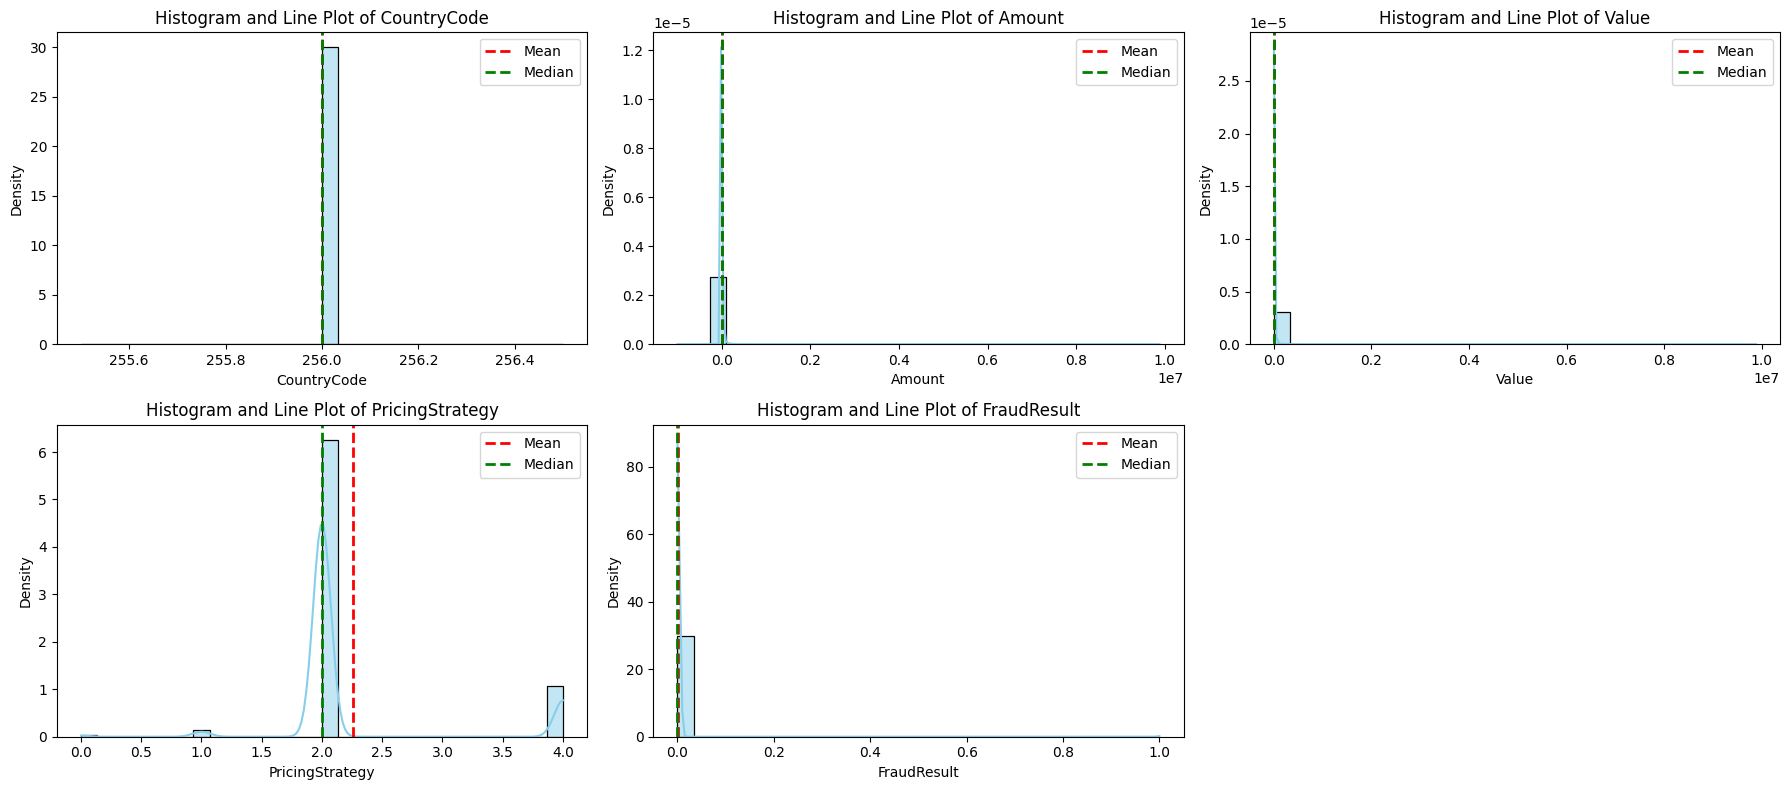

In [12]:
# Plot numerical features
plot_numeric_columns(df)

Distribution of Categorical Features


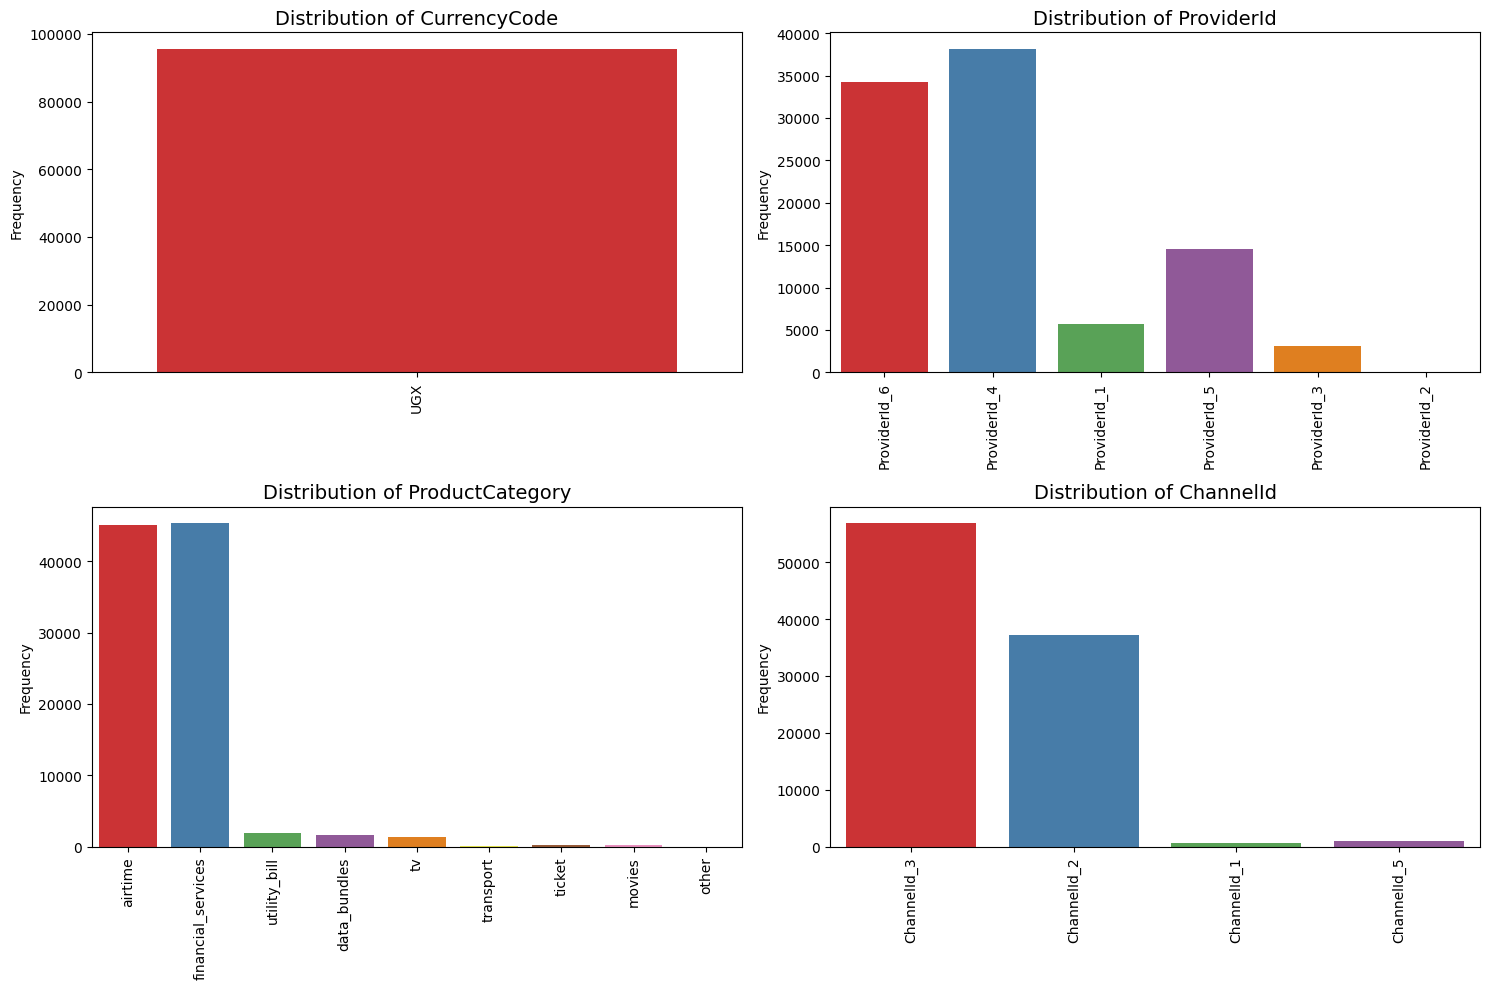

In [13]:
# Plot categorical features
plot_categorical_columns(df)

Correlation Analysis


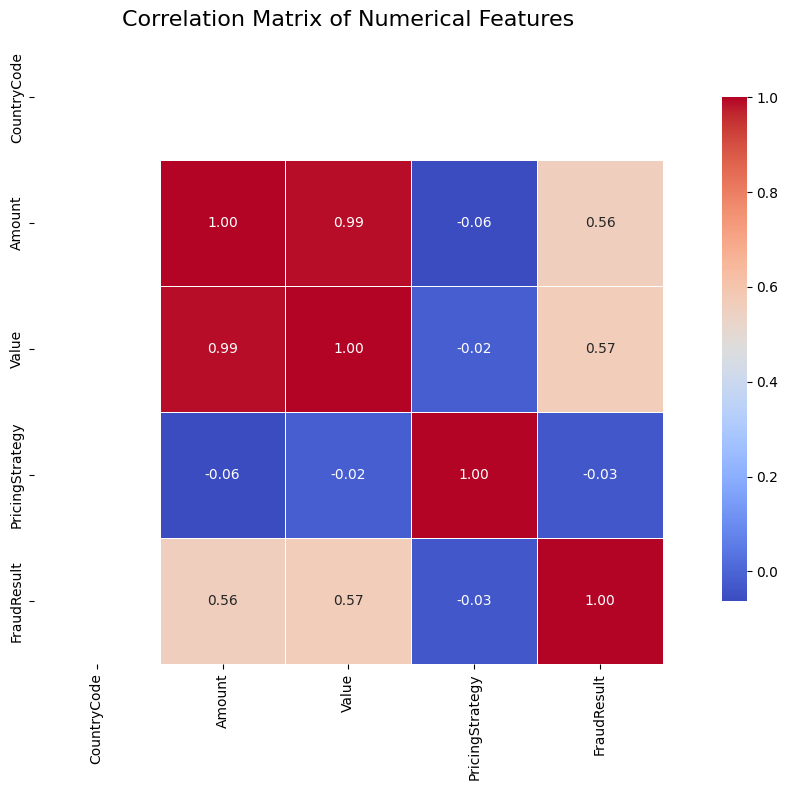

In [14]:
# Plot categorical matrix
plot_correlation_matrix(df)

Outliers

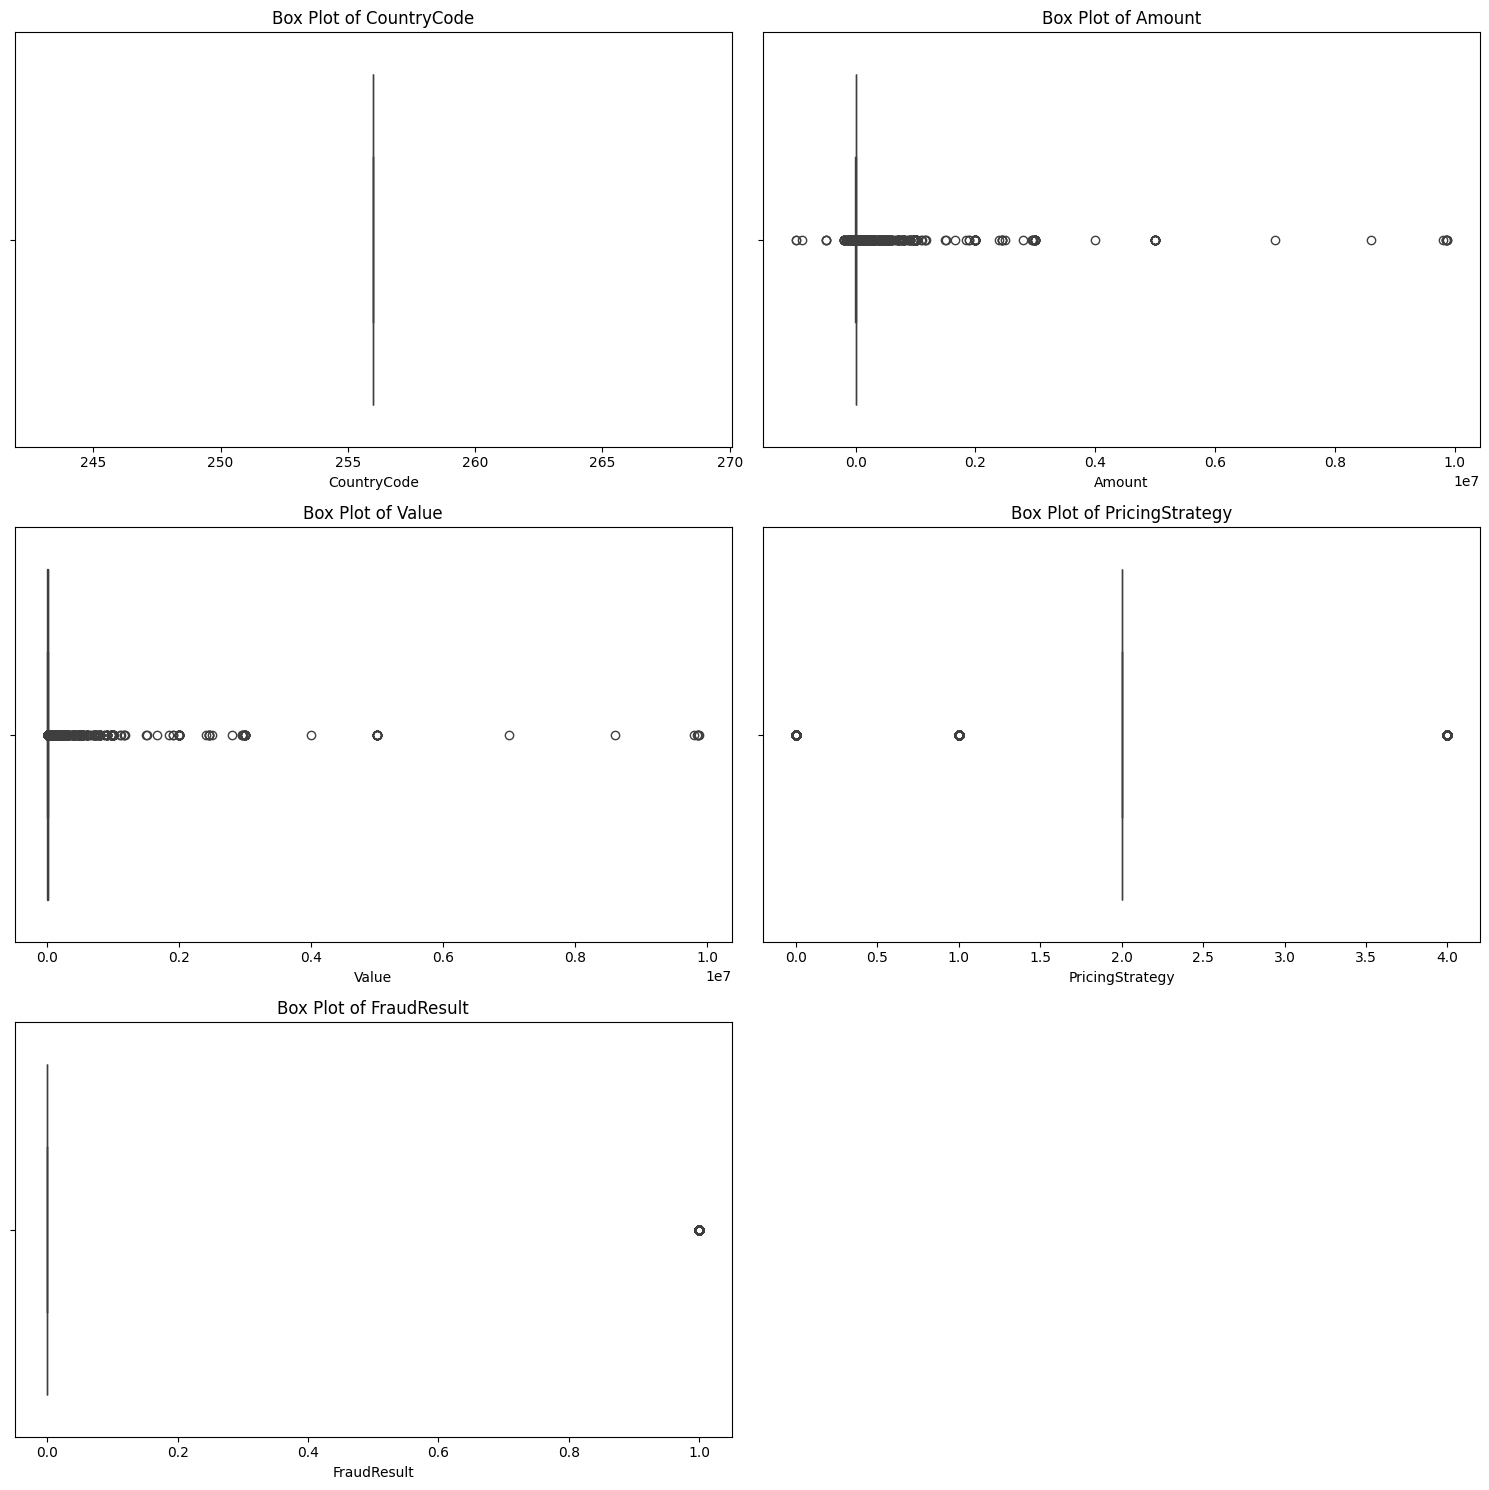

In [18]:
# Detect Outliers
detect_outliers(df)

Missing values

In [15]:
missing_values = df.isnull().sum()
print(missing_values)

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64
